# seaborn Library

In this set of problems, you will use a library called *seaborn* which is a popular data visualization package. One of the challenges for this problem set is to find the information you need yourself. **For each problem, you should try to find which function you can use and how to use it in the [documentation](https://seaborn.pydata.org/api.html#).** The website also contains a [tutorial](https://seaborn.pydata.org/tutorial.html) that provides you with a quick overview of the things that are possible in `seaborn`, and also shows you how to use its functions. Most `seaborn` functions are built to utilize `pandas`'s `DataFrame` and `Series` structures. As such, you should try to use them as much as possible! 

The problems below are all inspired by research in different fields of biology. Problems are adapted from [Data Carpentry for Biologists](https://datacarpentry.org/semester-biology/). 

## exploration_3.ipynb

The following set of seaborn exercises will be a part of your DE assignment package. You should submit this **notebook file** filled with your answers as your assignment C3. Name your file as `exploration_3.ipynb` for the submission.

Before you submit your assignment, please press **"Restart Kernel and Run All Cells"** option under the Kernel button of the menu bar to test your code. This will make sure that your code works as you intended, from top to bottom, because we will check your submitted code by running it ourselves from top to bottom. **Remember that** notebooks keep the information of previously executed code cells in the memory until the kernel is reset. 

Before you start, first load the required libraries below: 

In [76]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set(style="darkgrid")

## 1. Shrub Volume

Dr. Granger is interested in studying the factors controlling the size and carbon storage of shrubs. She has conducted a small preliminary experiment looking at the effect of three different treatments on shrub volume at four different locations. She wants to conduct a preliminary analysis of this data to include in a grant proposal and she would like you to conduct the analysis for her (she might be a world renowned expert in carbon storage in plants, but she sure doesn’t know much about computers). 

The data is provided inside the `data` folder, and it is loaded in the code cell below. Make sure to keep the data folder in the correct directory.

### Questions:

**1.1.** Import the data using `pandas`'s `.read_csv()` method and print out the first few rows of the data using the `.head()` method.

In [77]:
### your code here

shrub = pd.read_csv('data/shrub-volume-data.csv')
shrub.head()

site  experiment  length  width  height
0     1           1     2.2    1.3     9.6
1     1           2     2.1    2.2     7.6
2     1           3     2.7    1.5     2.2
3     2           1     3.0    4.5     1.5
4     2           2     3.1    3.1     4.0

**1.2.** Select the data from the "height" column and print it.

In [78]:
### your code here

print(shrub['height'])

0     9.6
1     7.6
2     2.2
3     1.5
4     4.0
5     3.0
6     4.5
7     2.3
8     7.5
9     3.2
10    6.5
11    2.7
Name: height, dtype: float64


**1.3.** Multiply the "length", "width", and "height" columns to get a `volume` `Series`. Add it to the `DataFrame` with an appropriate column name and print the first few rows. Do this without using a loop (for a hint, look back at the pandas exercises!).

In [79]:
### your code here

volume_Series = shrub['length'] * shrub['width'] * shrub['height']
shrub['volume'] = volume_Series
shrub['volume'].head()

0    27.456
1    35.112
2     8.910
3    20.250
4    38.440
Name: volume, dtype: float64

**1.4.** Add a "carbon" column containing the shrub carbon storage given by the equation `1.8 + 2 x log(volume)`. You can use the `log` function from the `numpy` library imported as `np` (see the first code cell above).

In [80]:
### your code here
carbon = 1.8 + 2 * np.log(shrub['volume'])
shrub['carbon'] = carbon
shrub['carbon'].head()


0    8.425169
1    8.917086
2    6.174348
3    7.816310
4    9.098197
Name: carbon, dtype: float64

**1.5.** Select the volume data for all of the plants with volumes greater than 20 and print out the result. **Hint:** remember *masking*.

In [81]:
### your code here
masking = shrub.mask(shrub['volume'] > 20)
print(masking)

    site  experiment  length  width  height  volume    carbon
0    NaN         NaN     NaN    NaN     NaN     NaN       NaN
1    NaN         NaN     NaN    NaN     NaN     NaN       NaN
2    1.0         3.0     2.7    1.5     2.2   8.910  6.174348
3    NaN         NaN     NaN    NaN     NaN     NaN       NaN
4    NaN         NaN     NaN    NaN     NaN     NaN       NaN
5    NaN         NaN     NaN    NaN     NaN     NaN       NaN
6    3.0         1.0     1.9    1.8     4.5  15.390  7.267436
7    3.0         2.0     1.1    0.5     2.3   1.265  2.270144
8    NaN         NaN     NaN    NaN     NaN     NaN       NaN
9    NaN         NaN     NaN    NaN     NaN     NaN       NaN
10   NaN         NaN     NaN    NaN     NaN     NaN       NaN
11   4.0         3.0     1.2    1.8     2.7   5.832  5.326720


**1.6.** The following code displays the average height of a plant at each site:

```
data_means = data.groupby('site').mean()
print(data_means['height'])
```

Modify the code to calculate the average volume of a plant in each experiment type.

In [82]:
### your code here
shrub_means = shrub.groupby('experiment').mean()
print(shrub_means['volume'])


experiment
1    22.03800
2    53.80425
3    22.06050
Name: volume, dtype: float64


**1.7.** Calculate the minimum volumes of the plants at each site and print it out.

In [83]:
### your code here
shrub_min = shrub.groupby('site').min()
print(shrub_min['volume'])
print(shrub)

site
1     8.910
2    20.250
3     1.265
4     5.832
Name: volume, dtype: float64
    site  experiment  length  width  height   volume     carbon
0      1           1     2.2    1.3     9.6   27.456   8.425169
1      1           2     2.1    2.2     7.6   35.112   8.917086
2      1           3     2.7    1.5     2.2    8.910   6.174348
3      2           1     3.0    4.5     1.5   20.250   7.816310
4      2           2     3.1    3.1     4.0   38.440   9.098197
5      2           3     2.5    2.8     3.0   21.000   7.889045
6      3           1     1.9    1.8     4.5   15.390   7.267436
7      3           2     1.1    0.5     2.3    1.265   2.270144
8      3           3     3.5    2.0     7.5   52.500   9.721626
9      4           1     2.9    2.7     3.2   25.056   8.242227
10     4           2     4.5    4.8     6.5  140.400  11.688991
11     4           3     1.2    1.8     2.7    5.832   5.326720


**1.8.** Using seaborn, create a [barplot](https://seaborn.pydata.org/generated/seaborn.barplot.html) showing the average carbon storage per experiment. Note that you do **not** have to use `groupby()` here as seaborn does it for you automatically when creating a barplot!

<Axes: xlabel='experiment', ylabel='carbon'>

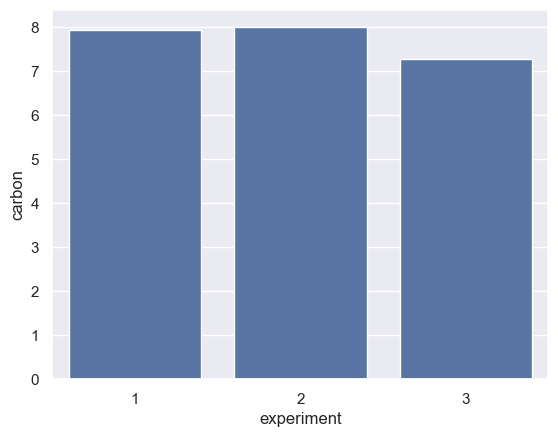

In [84]:
### your code here
sns.barplot(data=shrub, x='experiment', y='carbon', errorbar= None)

## 2. Adult vs. Newborn Size

It makes sense that larger organisms have larger offspring but the mathematical form of this relationship is unclear. Let’s look at the problem empirically for mammals: what kind of relationship is there between the adult size and newborn size in mammals?

### Questions:

**2.0.** Take a look at the data file ("mammal_lifehistories.tsv") provided in the `data` folder.

- Is there a header of the dataset? 

- How many columns are there in this dataset?

- What is the delimiter of this dataset? Which special character indicates this delimiter in Python while importing the dataset using `read_csv` function?

- Missing data in this file is specified by `-999` and `-999.00`. How do you tell Pandas that these are null values (so that they will not be plotted in our graphs later) while using the `read_csv` function?

- There are some extra blank lines at the end of this file. How would you get rid of them?

Answer these questions about the format of this dataset and write your answers in the code cell below.

Import the mammal-data (`'data/mammal_lifehistories.tsv'`) into a pandas `DataFrame` using `read_csv` function of Pandas. While importing, make sure to take into account your answers about the format of the dataset.

**Tip:** You can check the format of the imported data using `.head()` function.

In [85]:
### your answers about the dataset format:

# There is a header of the dataset.

# There are 14 columns in the dataset.

# The delimiter of the dataset is tab. In python, /t indicates tab.

# I can tell pandas that these are null values by using the parameter --- 'na_values'in read_csv() to get rid of them.

# I can use '.dropna('how'=all)' in read_csv to get rid of extra blank lines at the end of this file.


### your code to import the dataset:
import pandas as pd

# Define a value to be treated as NaN
# read csv file
mammal_lifehistories = pd.read_csv('data/mammal_lifehistories.tsv',sep='\t',na_values=[-999.00,-999.0,-999], skip_blank_lines=True).dropna(how='all')
mammal_lifehistories.head()

order          family        Genus        species   mass(g)  \
0  Artiodactyla  Antilocapridae  Antilocapra      americana   45375.0   
1  Artiodactyla         Bovidae        Addax  nasomaculatus  182375.0   
2  Artiodactyla         Bovidae    Aepyceros       melampus   41480.0   
3  Artiodactyla         Bovidae   Alcelaphus     buselaphus  150000.0   
4  Artiodactyla         Bovidae   Ammodorcas        clarkei   28500.0   

   gestation(mo)  newborn(g)  weaning(mo)  wean mass(g)  AFR(mo)  \
0           8.13     3246.36         3.00        8900.0    13.53   
1           9.39     5480.00         6.50           NaN    27.27   
2           6.35     5093.00         5.63       15900.0    16.66   
3           7.90    10166.67         6.50           NaN    23.02   
4           6.80         NaN          NaN           NaN      NaN   

   max. life(mo)  litter size  litters/year              refs  
0          142.0         1.85          1.00  1,2,6,9,23,26,27  
1          308.0         1.00          0.99      1,2,17,23,26  
2          213.0         1.00          0.95     1,2,8,9,23,29  
3          240.0         1.00           NaN         1,2,17,23  
4            NaN         1.00           NaN               1,2

**2.1.** We want to understand the relationship between the adult mass and newborn mass. Create a graph showing this relationship. What kind of graph can display a relationship between two variables? 

The quality of the graph is important; make it clear and informative for the reader (e.g. by adding titles, labels, colors, etc.). 

<Axes: xlabel='mass(g)', ylabel='newborn(g)'>

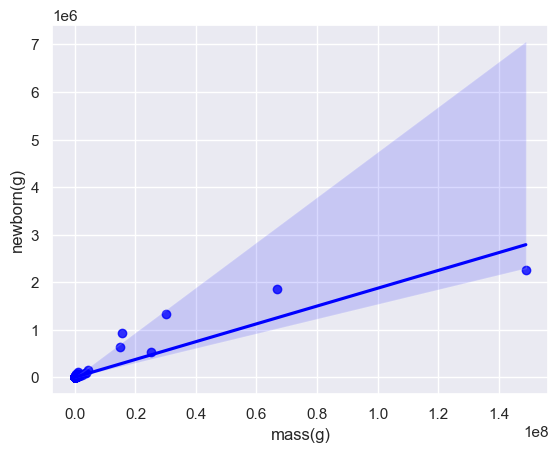

In [86]:
### your code here
sns.regplot(data=mammal_lifehistories, x="mass(g)", y="newborn(g)", color='blue', label='Relationship between adult mass and newborn mass')


**2.2.** Sometimes, logarithms of the values reveal clearer relationship patterns. This time, repeat the same graph but showing the relationship between the logarithms of the adult mass and newborn mass, and make it clear and informative for the reader. 

To set a log scale for both axes, use:

```
ax = plt.gca()
ax.set(xscale="log", yscale="log")
```

<Axes: xlabel='mass(g)', ylabel='newborn(g)'>

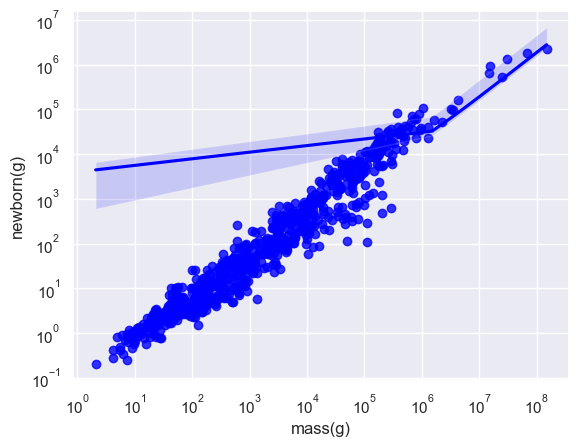

In [87]:
### your code here
ax = plt.gca()
ax.set(xscale='log', yscale='log')
sns.regplot(data=mammal_lifehistories, x="mass(g)", y="newborn(g)", color='blue', label='Relationship between adult mass and newborn mass')

**2.3.** Find how many different Order's are included in this dataset of mammals. Print the output with a nicely formatted sentence. 

In [88]:
### your code here
orders = []

for i in mammal_lifehistories['order']:
    orders.append(i)

orders = set(orders)
print('There are',len(orders), 'orders are included in this dataset.')


There are 17 orders are included in this dataset.


**2.4.** Calculate the average mass of adults and newborns for each Order and print them out.

In [89]:
### your code here
mammal_lifehistories_average_mass = mammal_lifehistories[['order','mass(g)','newborn(g)']]
mammal_lifehistories_average_mass = mammal_lifehistories_average_mass.groupby('order').mean()
print(mammal_lifehistories_average_mass)

                     mass(g)     newborn(g)
order                                      
Artiodactyla    1.158426e+05    7082.125820
Carnivora       4.338151e+04    3656.794420
Cetacea         9.830457e+06  343076.875417
Dermoptera      1.000000e+03      35.900000
Hyracoidea      3.030835e+03     231.060000
Insectivora     1.326414e+02       6.056000
Lagomorpha      1.701988e+03      56.974231
Macroscelidea   1.238022e+02      24.471667
Perissodactyla  6.944867e+05   27015.338333
Pholidota       7.980000e+03     276.450000
Primates        5.145331e+03     287.237658
Proboscidea     3.342500e+06   99522.575000
Rodentia        6.370456e+02      35.450121
Scandentia      3.885833e+02      12.784000
Sirenia         1.169400e+06   22877.776667
Tubulidentata   6.000000e+04    1734.000000
Xenarthra       7.238500e+03     314.292000


**2.5.** Litter size information is also provided in the dataset. Make a barplot to explore the average litter sizes of each Order.  Try to improve the format of the graph by rotating the tick labels of the x-axis. 

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 [Text(0, 0, 'Artiodactyla'),
  Text(1, 0, 'Carnivora'),
  Text(2, 0, 'Cetacea'),
  Text(3, 0, 'Dermoptera'),
  Text(4, 0, 'Hyracoidea'),
  Text(5, 0, 'Insectivora'),
  Text(6, 0, 'Lagomorpha'),
  Text(7, 0, 'Macroscelidea'),
  Text(8, 0, 'Perissodactyla'),
  Text(9, 0, 'Pholidota'),
  Text(10, 0, 'Primates'),
  Text(11, 0, 'Proboscidea'),
  Text(12, 0, 'Rodentia'),
  Text(13, 0, 'Scandentia'),
  Text(14, 0, 'Sirenia'),
  Text(15, 0, 'Tubulidentata'),
  Text(16, 0, 'Xenarthra')])

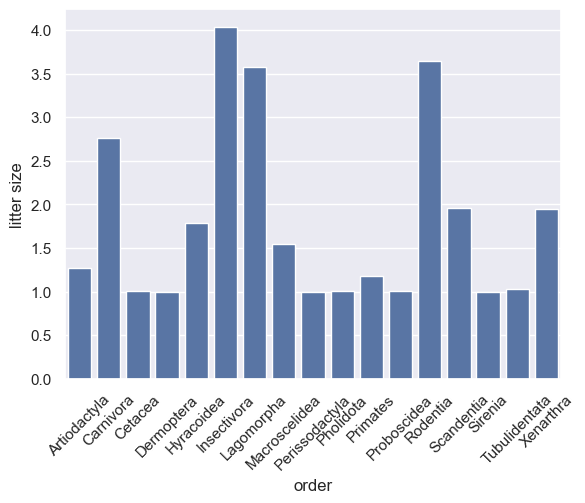

In [90]:
### your code here
mammal_lifehistories_average_litter = mammal_lifehistories[['order','litter size']]
mammal_lifehistories_average_litter = mammal_lifehistories_average_litter.groupby('order').mean()
sns.barplot(data=mammal_lifehistories_average_litter,x='order',y='litter size')
plt.xticks(rotation=45) 


**2.6.** Find the Order which has the largest litter size. Print the name of this Order, its adult mass and its newborn mass in a nice format.

In [91]:
### your code here
mammal_lifehistories_maxlitter = mammal_lifehistories[['order','mass(g)','newborn(g)','litter size']]
mammal_lifehistories_maxlitter = mammal_lifehistories_maxlitter.groupby('order').sum('litter size')
max_litter_size = max(mammal_lifehistories_maxlitter['litter size'])
print(mammal_lifehistories_maxlitter[mammal_lifehistories_maxlitter['litter size']== max_litter_size])


           mass(g)  newborn(g)  litter size
order                                      
Rodentia  387323.7    11733.99      2242.88


**2.7.** Create two violin plots visualizing the distribution of adult mass and newborn mass of the `Primates` Order. Make sure that the graphs are clear for the reader. After that, answer the following two questions:

- What do you see? Explain your conclusions from these visuals. 

- What would be your next step to explore the relationship between the adult and newborn mass of the Primates further?

<Axes: >

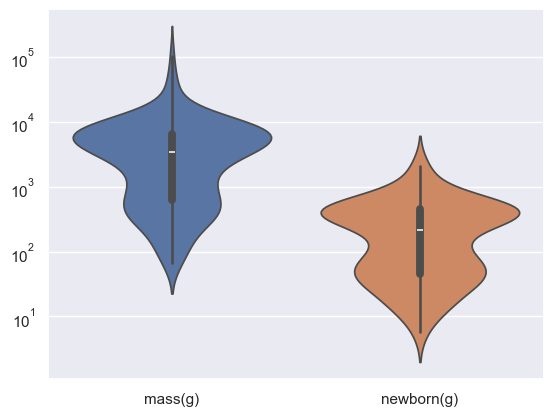

In [92]:
### your code here

mammal_lifehistories_mass = mammal_lifehistories[['order','mass(g)','newborn(g)']]
primates = mammal_lifehistories_mass[mammal_lifehistories_mass['order'] =='Primates']
ax = plt.gca()
ax.set(yscale='log')
sns.violinplot(data=primates)

# The mass of adult is larger than that of newborn, and the variance of adult is bigger than the newborn.
# I will explore the correlation between the adult and newborn mass of the Primates.

## 3. Mammal Body Size

There were a relatively large number of extinctions of mammalian species roughly 10,000 years ago. To understand why these extinctions happened, scientists are interested in exploring whether there were differences in the body size of those species that went extinct and those that did not.

The dataset `'data/mammal.tsv'` is the largest dataset on mammalian body size in the world. This dataset has data on the mass of recently extinct mammals as well as extant mammals (i.e. those that are still alive today). You can take a look at the [original dataset's metadata](https://web.archive.org/web/20191219110715/http://www.esapubs.org/archive/ecol/E084/094/metadata.htm) to understand the structure of the data. 

**Let’s start exploring the data...**

First of all, import the mammal-data (`'data/mammal.tsv'`) into a pandas `DataFrame`. 

- Notice that there is no header in this dataset. You can use an optional argument of `read_csv()` to prevent pandas from taking the first row data as the header (due to the default setting). It also means that you need to define the column names yourself.

- Missing data in this file is specified by `-999` and `-999.00`. 

- Notice that North America is denoted by **NA** in the original data. `NA` values are counted as null values by `read_csv()` by default. To be able to read the `NA` values of the original data, use the following optional argument of `read_csv()`: `keep_default_na = False`. It will allow you to read the North America continent. 

- The data also contains entries marked as *historical*, those can be considered *extinct*. It also contains entries marked *introduction* those can be considered *extant*. You can use the pandas method `replace()` to change those values in your `DataFrame`.

- One key thing to remember is that species can occur in more than one continent, and if they do then they will occur more than once in this dataset. 

### Questions:

**3.1.** Determine the number of species. Remember that a species is uniquely defined by the combination of its genus name and its species name. Print the result to the screen. The number should be somewhere between 4000 and 5000.

In [93]:
### your code here
#read csv file
mammal = pd.read_csv('data/mammal.tsv',sep='\t',na_values=[-999.00,-999], skip_blank_lines=True, keep_default_na = False, names=["continent", "status", "order", "family", "genus","species","log_mass","combined_mass","reference"])
mammal.replace(['historical','introduction'],['extinct','extant'],inplace=True)

# combine genus and species
# a_species = mammal['genus'] + ' ' + mammal['species']
mammal['a_species'] = mammal['genus'] + ' ' + mammal['species'] 

unique_mammal = mammal.drop_duplicates(subset=['a_species'])
count = unique_mammal['a_species'].count()

# use set to make them unique
print('The number of species is',count)

The number of species is 4889


**3.2.** Find out how many of the species are extinct and how many are extant, and then print the result to the screen. **Hint:** First separate the data into the extinct and extant components and then count the number of species.

In [94]:
### your code here
# seperate data into the extinct and extant components

extinct = unique_mammal.loc[unique_mammal['status']=='extinct']
extant = unique_mammal.loc[unique_mammal['status']=='extant']

extinct_species = extinct['a_species']
extant_species = extant['a_species']

extinct_count = extinct_species.count()
extant_count = extant_species.count()

print('There are',extinct_count,' extinct species','and',extant_count,'extant species.')

There are 313  extinct species and 4576 extant species.


**3.3.** Find out how many families are present in the dataset.

In [95]:
### your code here
print('There are',mammal['family'].drop_duplicates().count(),'families.')

There are 152 families.


**3.4.** Now print the genus name, the species name, and the mass of the largest and smallest species. Note that it is not possible for a mammal to have negative mass.

In [96]:
### your code here
max_mass_genus = mammal.loc[mammal['combined_mass']==max(mammal['combined_mass'])]['order'].to_string(index=False)
max_mass_species = mammal.loc[mammal['combined_mass']==max(mammal['combined_mass'])]['species'].to_string(index=False)

min_mass_genus = mammal.loc[mammal['combined_mass']==min(mammal['combined_mass'])]['order'].to_string(index=False)
min_mass_species = mammal.loc[mammal['combined_mass']==min(mammal['combined_mass'])]['species'].to_string(index=False)

# print the genus name and the species name
print(f'The genus name of the largest species is {max_mass_genus}')
print(f'The genus name of the smallest species is {min_mass_genus}')

print(f'The species name of the largest species is {max_mass_species}')
print(f'The species name of the smallest species is {min_mass_species}')

# sort 'ciombined mass' by ascending order and print the largest and smallest masses with index
mammal.sort_values('combined_mass',ascending=False,inplace=True,ignore_index=True)
mammal = mammal.dropna()
print('The mass of the largest species is',mammal['combined_mass'].iloc[0],'and the mass of the smallest species is',mammal['combined_mass'].iloc[-1])




The genus name of the largest species is Cetacea
The genus name of the smallest species is Insectivora
The species name of the largest species is musculus
The species name of the smallest species is etruscus
The mass of the largest species is 190000000.0 and the mass of the smallest species is 1.8


**3.5.** Create a plot that shows the average body size for the extinct species versus the extant species. Make sure that is directly clear from the plot which is which. What kind of plot should you use here?

<Axes: xlabel='status', ylabel='combined_mass'>

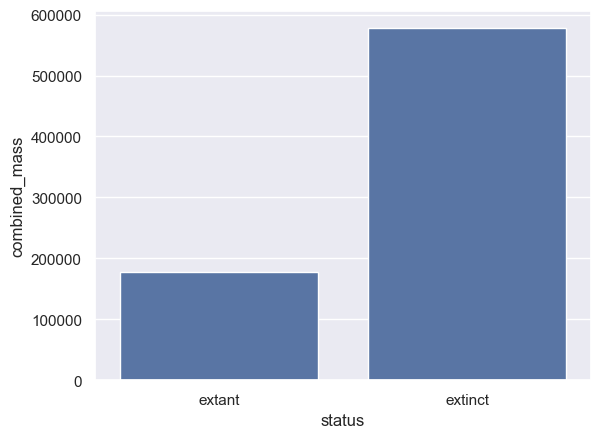

In [97]:
### your code here

sns.barplot(data=mammal,x='status',y='combined_mass',errorbar=None)

**3.6.** Looking at the average mass of extinct and extant species overall is interesting but there are lots of different processes that could cause size-biased extinctions. Therefore, it’s not as informative as we might like. However, if we see the exact same pattern on each of the different continents, it might really tell us that there was some worldwide event. Repeat the analysis of before, but this time, compare the mean masses within each of the different continents. 

- The continent labels in the data are not very consistent. For example, `AUS`, `OC`, and `Oceanic` can all be merged. Try to find logical combinations; if you cannot, create a seperate category. It is important to clean this up for this assignment. Again, you can use `replace()` for this purpose.

- Create one barplot per continent where you show the average mass of the extant and extinct species on that continent. Also print the difference between the average extant and average extinct masses for each of the continents AF, AUS, EA, SA and NA.

- Try to make the code as clean as possible! There is no need to copy and paste the same code for each of the categories!

<Axes: xlabel='continent', ylabel='combined_mass'>

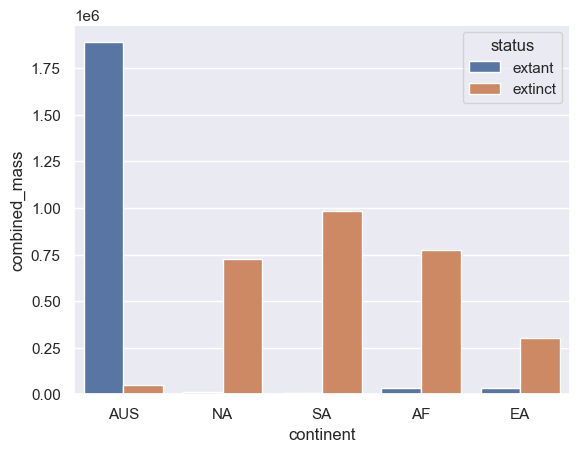

In [101]:
### your code here

#merge same continents and drop non-continent
mammal.replace(['OC','Oceanic'],'AUS',inplace=True)
mammal = mammal.drop(mammal[mammal['continent']=='Insular'].index)

#plot
sns.barplot(data=mammal,x='continent',y='combined_mass',hue='status',errorbar=None)


**3.7.** We have previously compared the average masses of extant and extinct species on different continents to understand whether size has an influence on extinction in mammals. Looking at the averages was a good start, but we really need to look at the full distributions of masses of the two groups to get the best picture of whether or not there was a major size bias in extinctions during the late Pleistocene. 

Make a plot for each continent that you think is worth visualizing. Each plot should contain two histograms that display the number of extinct and extant species. Take a look at [this page from the tutorial](https://seaborn.pydata.org/tutorial/distributions.html) to see how you can easily plot these distributions. Use the log(mass) rather than the mass itself so that you can see the form of the distributions more clearly. Label the axes appropriately.

Example of how such a plot _could_ look like:

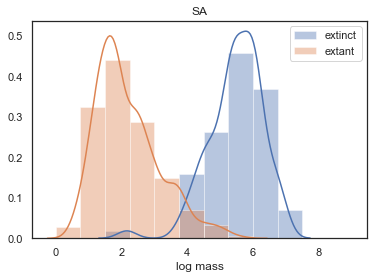
    
**Sidenote:** Histogram refers to a graphical representation that displays data by way of bars to show the distribution of numerical data. A barplot is a representation of data that uses bars to compare different categories of data. In other words, a histogram presents numerical data whereas a barplot shows categorical data. [This website](https://keydifferences.com/difference-between-histogram-and-bar-graph.html) gives a more comprehensive list of differences (it also lists visual differences and why these are present).

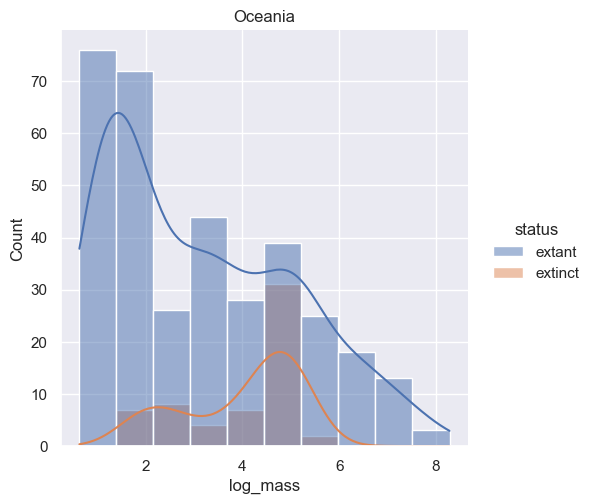

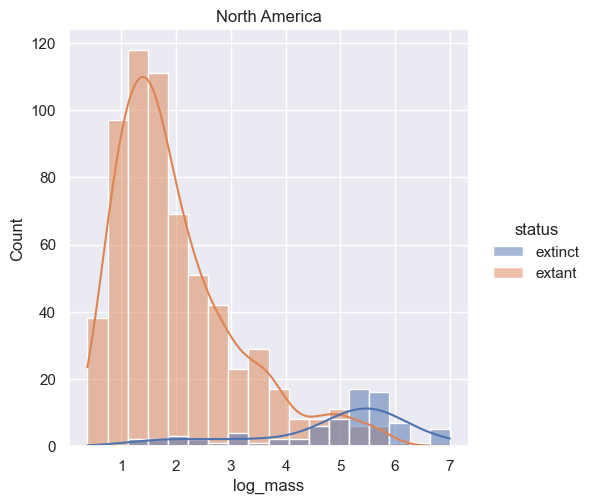

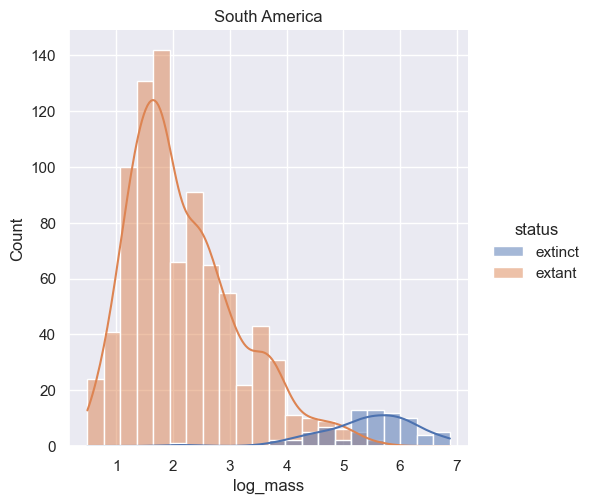

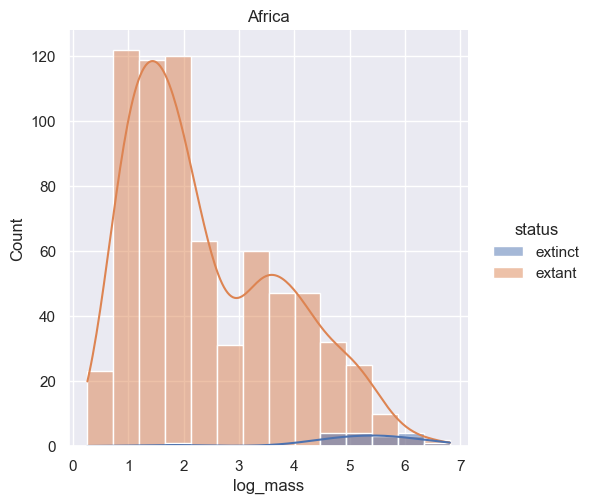

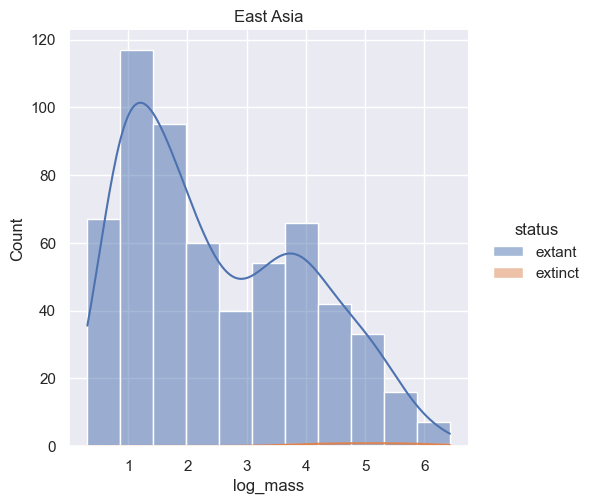

In [99]:
### your code here

continent_mass = mammal.groupby('continent')

# OC
OC = continent_mass.get_group('OC')
sns.displot(OC, x="log_mass",hue='status',kde=True).set(title='Oceania')

# NA
NA = continent_mass.get_group('NA')
sns.displot(NA, x="log_mass",hue='status',kde=True).set(title='North America')

# SA
SA = continent_mass.get_group('SA')
sns.displot(SA, x="log_mass",hue='status',kde=True).set(title='South America')

# AF
AF = continent_mass.get_group('AF')
sns.displot(AF, x="log_mass",hue='status',kde=True).set(title='Africa')

# EA
EA = continent_mass.get_group('EA')
sns.displot(EA, x="log_mass",hue='status',kde=True).set(title='East Asia')
